**IRIS Dataset**

In [10]:
import pandas as pd

df_iris = pd.read_csv('/content/sample_data/iris.csv')
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
display(df_iris[['petal_width', 'petal_length']].describe())

display(df_iris.isnull().sum())
display(df_iris[['petal_width', 'petal_length']].isnull().sum())

,petal_width,petal_length
count,150.000000,150.000000
mean,1.198667,3.758667
std,0.763161,1.764420
min,0.100000,1.000000
25%,0.300000,1.600000
50%,1.300000,4.350000
75%,1.800000,5.100000
max,2.500000,6.900000


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


,0
petal_width,0
petal_length,0


In [12]:
df_iris_reduced = df_iris.drop(['sepal_length', 'sepal_width'], axis=1)

display(df_iris_reduced.head())

display(df_iris_reduced.info())

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   species       150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


None

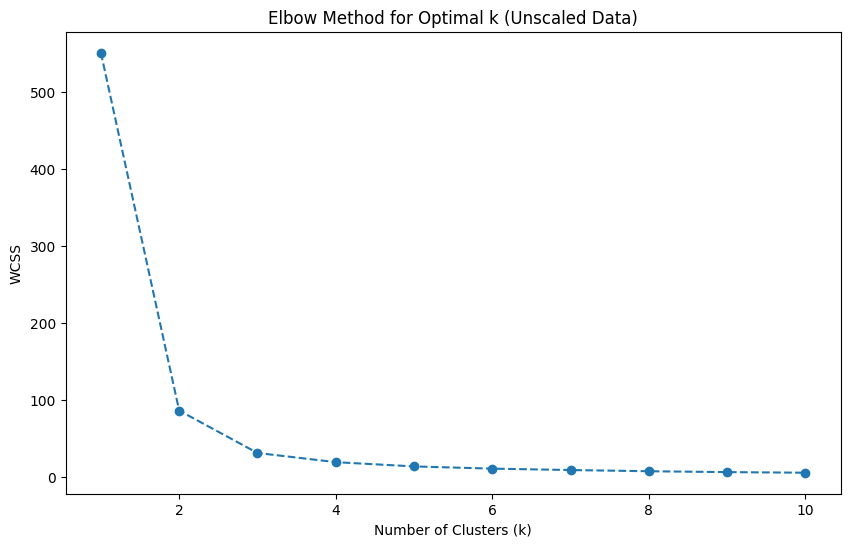

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss_unscaled = []
# Use the unscaled data
data_unscaled = df_iris.drop(['sepal_length', 'sepal_width', 'species'], axis=1)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_unscaled)
    wcss_unscaled.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_unscaled, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Unscaled Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_iris_reduced[['petal_width', 'petal_length']])

df_iris_reduced[['petal_width', 'petal_length']] = scaler.transform(df_iris_reduced[['petal_width', 'petal_length']])

display(df_iris_reduced.head())

,petal_length,petal_width,species
0,-1.341272,-1.312977,Iris-setosa
1,-1.341272,-1.312977,Iris-setosa
2,-1.398138,-1.312977,Iris-setosa
3,-1.284407,-1.312977,Iris-setosa
4,-1.341272,-1.312977,Iris-setosa


In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_iris_reduced[['petal_width', 'petal_length']])
    wcss.append(kmeans.inertia_)

k_values = list(range(1,11))

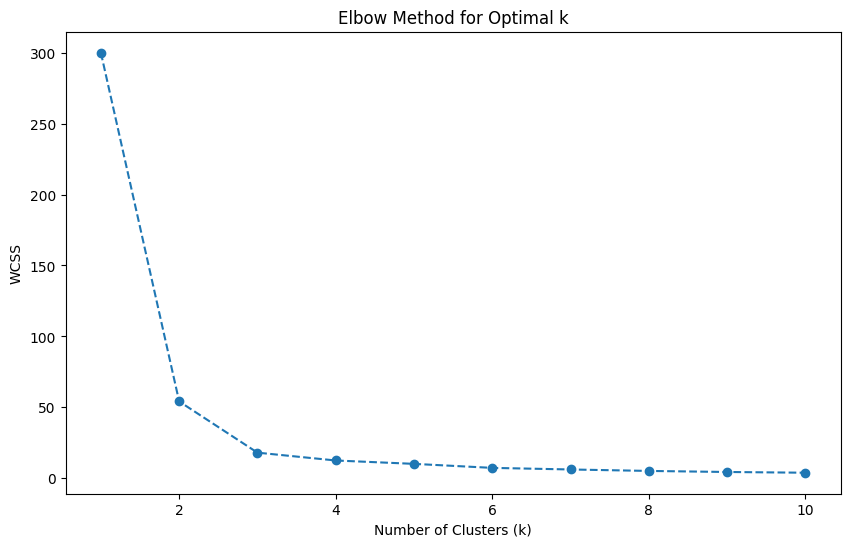

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans

optimal_k = 3   #from elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_iris_reduced[['petal_width', 'petal_length']])

df_iris_reduced['cluster'] = kmeans.labels_

display(df_iris_reduced.head())

,petal_length,petal_width,species,cluster
0,-1.341272,-1.312977,Iris-setosa,1
1,-1.341272,-1.312977,Iris-setosa,1
2,-1.398138,-1.312977,Iris-setosa,1
3,-1.284407,-1.312977,Iris-setosa,1
4,-1.341272,-1.312977,Iris-setosa,1
